# Introduction

This is a project notebook that'll run a basic analysis for machine learning / classification techniques using some python libraries.  Although there are a variety of python libraries for this, this notebook will focus on a few widely popular libraries (scikit-learn, pandas, numpy, matplotlib, pytorch).  Feel free to take this notebook and adapt this for your purposes.

# Machine Learning Basics in a Nutshell

There are main tasks in machine learning break down into :

* Classification - Separating incoming data into two or more categories (e.g. is this image a hot dog or not)
* Regression - Given a set of inputs, predict a new value (e.g. how much will a house sell for if it has 2 bedrooms)

Generally, classification involves sorting inputs into different categories and regression tasks involve predicting a value.  

For this project we will use a [kaggle](https://www.kaggle.com/competitions) [competition](https://www.kaggle.com/c/titanic) to predict the which passengers on the Titanic survived.  We are given several CSV (comma separated value) files with information about passengers and whether they survived or not.  Our task is to use this information to generate a model that will predict whether a given passenger survived or not. We also have a validation set that we can use to test our model.  Finally, we can submit a csv file to kaggle to see how our model compares with others.  See [this page](https://www.kaggle.com/alexisbcook/titanic-tutorial) for detailed instructions on doing this and a tutorial guiding you through this process.



The first step is to import the python modules needed to create and test our models.  We'll import a few other modules in order to visualize our data as well.  We'll be looking at using two different models, a logistic regression classifier and a neural network classifier.  These are the two basic techniques used in machine learning.  To get a model that works well, you'll probably need to move past this and use other techniques such as bayesian classification or decision trees. 

*So without further ado, let's import all the things:*

In [170]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sklearn

Now setup variables to hold the locations of our data.  Note the submission_set holds information about passengers that our model needs to generate predictions for and which we need to submit to kaggle to get our model graded.

In [171]:
import pathlib
train_set = pathlib.Path.cwd() / "data" / "train.csv"
submission_set = pathlib.Path.cwd() / "data" / "test.csv"

Import the two sets as pandas dataframes

In [172]:
train_df = pd.read_csv(train_set)
test_df = pd.read_csv(submission_set)

Now let's look at our data briefly before doing anything with it. 

In [173]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We'll need to refer to the kaggle descriptions to properly decode the columns.  In general, understanding and cleaning your data sets is probably **90%** of the work required to do machine learning. Luckily kaggle has already cleaned the data set so we just need to properly decode it. The coding for the dataset is as follows:

| Variable | Definition	Key|
| -------- | -------------- |
| survival | Survival	0 = No, 1 = Yes|
| pclass | Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex | Sex |
| Age |	Age in years |
| sibsp |	# of siblings / spouses aboard the Titanic |
| parch |	# of parents / children aboard the Titanic |
| ticket |	Ticket number |
| fare | Passenger fare |
| cabin | Cabin number |
| embarked |	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton |

Note that missing data shows up as NaN values. 

Now let's visualize the data a bit to get a sense of what may be happening in our data set.

In [174]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
train_df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(train_df.Survived, train_df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
train_df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(train_df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
train_df.Age[train_df.Pclass == 1].plot(kind='kde')    
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
train_df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(train_df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Passengers per boarding location')

## Logistic Classification

Okay, let's try to create a model using logistic classification to make some predictions about who the survivors are.  Since most of us have seen James Cameron's Titanic, let's use a model inspired by the movie. For our model, we'll assume that survival  depends on the passenger class (i.e. rich people in first class got first dibs on spots in the life boats) and the sex of the passenger.

First, let's setup the model and code to do the logistic classification for us.  We'll use y for labels and X for features that our model will consider.  Also, we'll need to break up our training data into a training set and a test set so that we can test the model parameters while doing machine learning on the parameters.

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# convert Sex data to categories
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex_codes'] = train_df['Sex'].cat.codes
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df['Pclass'] = train_df['Pclass'].cat.codes
y = train_df.Survived
X = train_df[['Pclass', 'Sex_codes']]

#  randomly split data into a training and test set.  We'll use 25% of the data for testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

Let's look at how well our model did:

In [176]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       139
           1       0.71      0.70      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



Now let's look at the ROC curve for our model:

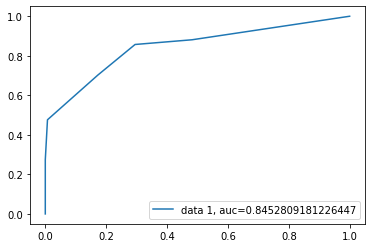

In [19]:

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Not bad but not great either, play around with the models to see if you can get a better result.  For extra try using another technique such as SVMs or decision trees (with or without boosting).  Generally boosted decision trees get you results that are close to state of the art.

## Using a Neural Network Classifier

Now let's use a neural network (NN) to do the same classification.  Note that using a NN has a huge tradeoff compared to a more analytical method such as using logistic regression.  Namely, a trained NN doesn't provide much explainability.  I.e. it's hard for a person to explain why any reasonably complex NN classified inputs.  This makes debugging and understanding where a NN may fail very difficult.

We'll use pytorch to do handle our NN training and classification.  Our model will consist of 2 input nodes: one for passenger class and another for the passenger sex.  The output of the model will be a single node indicating whether the passenger survived or not.  Finally we'll have 2 hidden layers with 5 nodes each connecting the input and output nodes.  

So let's get started:

In [20]:
# first import pytorch modules
import torch
import torch.nn as nn

In [166]:
# define a network to use for prediction

class TitanicNN(nn.Module):
  def __init__(self, emb_dims, n_cont, lin_layer_sizes, output_size=1):
    super().__init__()
    # use kaming_normal to initialize weights to reasonable values
    self.emb_layers = nn.ModuleList([nn.Embedding(x, y) for x, y in emb_dims])

    self.n_embs = sum([y for x, y in emb_dims])
    self.n_cont = n_cont

    # Linear Layers
    first_lin_layer = nn.Linear(self.n_embs + self.n_cont, lin_layer_sizes[0])

    self.lin_layers = nn.ModuleList(
        [first_lin_layer] + 
        [nn.Linear(lin_layer_sizes[i], lin_layer_sizes[i + 1]) for i in range(len(lin_layer_sizes) - 1)]
    )
    

    # Output Layer
    # 
    self.output_layer = nn.Linear(lin_layer_sizes[-1], output_size)
    nn.init.kaiming_normal_(self.output_layer.weight.data)

    # Batch Norm Layers
    self.first_bn_layer = nn.BatchNorm1d(self.n_cont)
    self.bn_layers = nn.ModuleList([nn.BatchNorm1d(size) for size in lin_layer_sizes])
    
  def forward(self, cont_data, cat_data):
    if self.n_embs != 0:
      x = [emb_layer(cat_data[:, i]) for i, emb_layer in enumerate(self.emb_layers)]
      x = torch.cat(x, 1)
      
    if self.n_cont != 0:
      normalized_cont_data = self.first_bn_layer(cont_data)

      if self.n_embs != 0:
        x = torch.cat([x, normalized_cont_data], 1) 
      else:
        x = cont_data
        
    for lin_layer, bn_layer in zip(self.lin_layers, self.bn_layers):
      x = torch.relu(lin_layer(x))
      x = bn_layer(x)

    x = self.output_layer(x)
    x = torch.sigmoid(x)
    return x

In [69]:
# helper class to handle dataframe -> dataset transformation
class TabularDataset(torch.utils.data.Dataset):
  def __init__(self, df, categorical_columns, output_column=None):
    super().__init__()
    self.len = df.shape[0]
    
    self.categorical_columns = categorical_columns
    self.continous_columns = [col for col in df.columns if col not in self.categorical_columns + [output_column]]
    
    if self.continous_columns:
      self.cont_X = df[self.continous_columns].astype(np.float32).values
    else:
      self.cont_X = np.zeros((self.len, 1))
      
    if self.categorical_columns:
      self.cat_X = df[self.categorical_columns].astype(np.int64).values
    else:
      self.cat_X = np.zeros((self.len, 1))
      
    if output_column != None:
      self.has_label = True
      self.label = df[output_column].astype(np.float32).values.reshape(-1, 1)
    else:
      self.has_label = False
  
  def __len__(self):
    return self.len
  
  def __getitem__(self, index):
    if self.has_label:
      return [self.label[index], self.cont_X[index], self.cat_X[index]]
    else:
      return [self.cont_X[index], self.cat_X[index]]

Let's run the model and get the accuracy. First format our data to fit what the code expects.

In [164]:
train_df = pd.read_csv(train_set)
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex_codes'] = train_df['Sex'].cat.codes
train_df['Pclass'] = train_df['Pclass'].astype('category')
train_df['Pclass'] = train_df['Pclass'].cat.codes

train_df = train_df[['Survived', 'Pclass', 'Sex_codes']]

# Sex and Pclass are only categorical variables
cat_cols = ['Pclass', 'Sex_codes']

# get dimensions of the categorical variables being used
categorical_dimensions = [int(train_df[col].nunique()) for col in cat_cols]
embedding_dimensions = [(x, min(50, (x + 1) // 2)) for x in categorical_dimensions]

# Survived is the output column
y = ['Survived']
train_dataset = TabularDataset(train_df, cat_cols, output_column='Survived')
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=False)

print(embedding_dimensions)

[(3, 2), (2, 1)]


In [168]:
# manually set the seed if we want reproducible results
# torch.manual_seed(2)

model = TitanicNN(embedding_dimensions, n_cont=0, lin_layer_sizes=[10, 10], output_size=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
no_of_epochs = 10
criterion = nn.BCELoss()

for epoch in range(no_of_epochs):
  epoch_loss = 0
  epoch_accuracy = 0
  i = 0
  for y, cont_x, cat_x  in train_dataloader:
    preds = model(cont_x, cat_x)
    loss = criterion(preds, y)
    epoch_loss += loss
    
    accuracy = ((preds > 0.5).float() == y).float().mean()
    epoch_accuracy += accuracy

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  print("Epoch ", epoch, ", loss: ", epoch_loss.item()/len(train_dataloader), "accuracy: ", epoch_accuracy.item()/len(train_dataloader))

Epoch  0 , loss:  0.6479754447937012 accuracy:  0.6427436556134906
Epoch  1 , loss:  0.5722329957144601 accuracy:  0.7266381808689663
Epoch  2 , loss:  0.49888750485011507 accuracy:  0.7612363951546806
Epoch  3 , loss:  0.482473475592477 accuracy:  0.7668167522975377
Epoch  4 , loss:  0.4745837960924421 accuracy:  0.7645846094403949
Epoch  5 , loss:  0.47481424467904226 accuracy:  0.7590042522975377
Epoch  6 , loss:  0.4732522283281599 accuracy:  0.7590042522975377
Epoch  7 , loss:  0.4713171550205776 accuracy:  0.7746292522975377
Epoch  8 , loss:  0.4705779893057687 accuracy:  0.7723971094403949
Epoch  9 , loss:  0.4701849733080183 accuracy:  0.767932823726109


Some of the code used in this notebook is from:

* https://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb
* https://www.kaggle.com/chriszou/titanic-with-pytorch-nn-solution